In [1]:
#Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go
from matplotlib.pyplot import figure

In [2]:
#importing database of stock data
googl_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/GOOGL/GOOGL.csv',parse_dates=['Date'],index_col='Date')

In [3]:
#checking data
googl_data.info(),googl_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4020 entries, 2004-08-19 to 2020-08-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4020 non-null   float64
 1   High       4020 non-null   float64
 2   Low        4020 non-null   float64
 3   Close      4020 non-null   float64
 4   Adj Close  4020 non-null   float64
 5   Volume     4020 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 219.8 KB


(None,
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64)

In [4]:
#renaming
df = googl_data

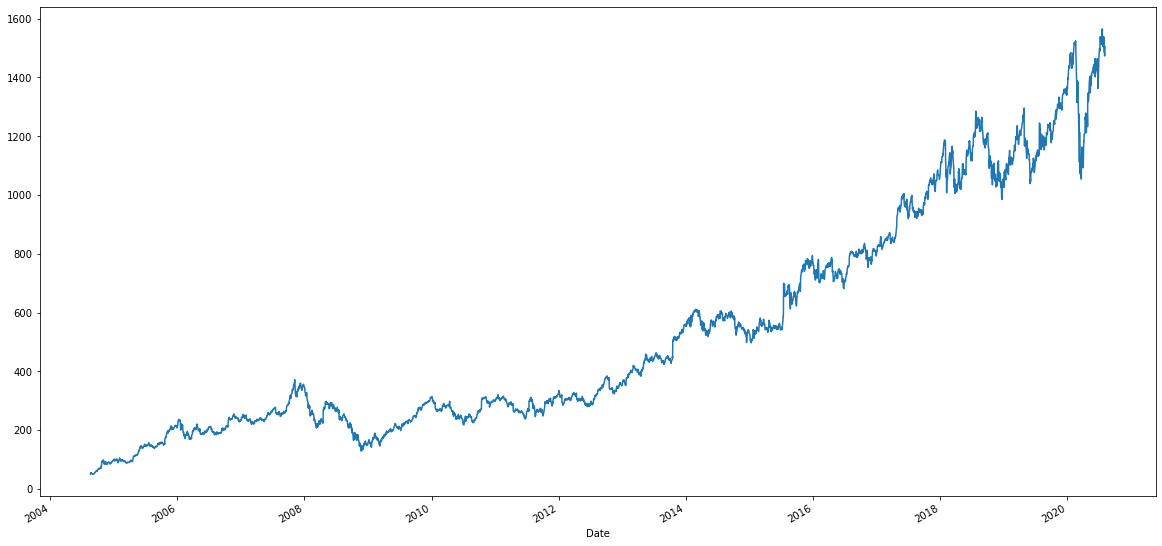

In [5]:
#Plot of data 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
df['Adj Close'].plot(ax=ax)

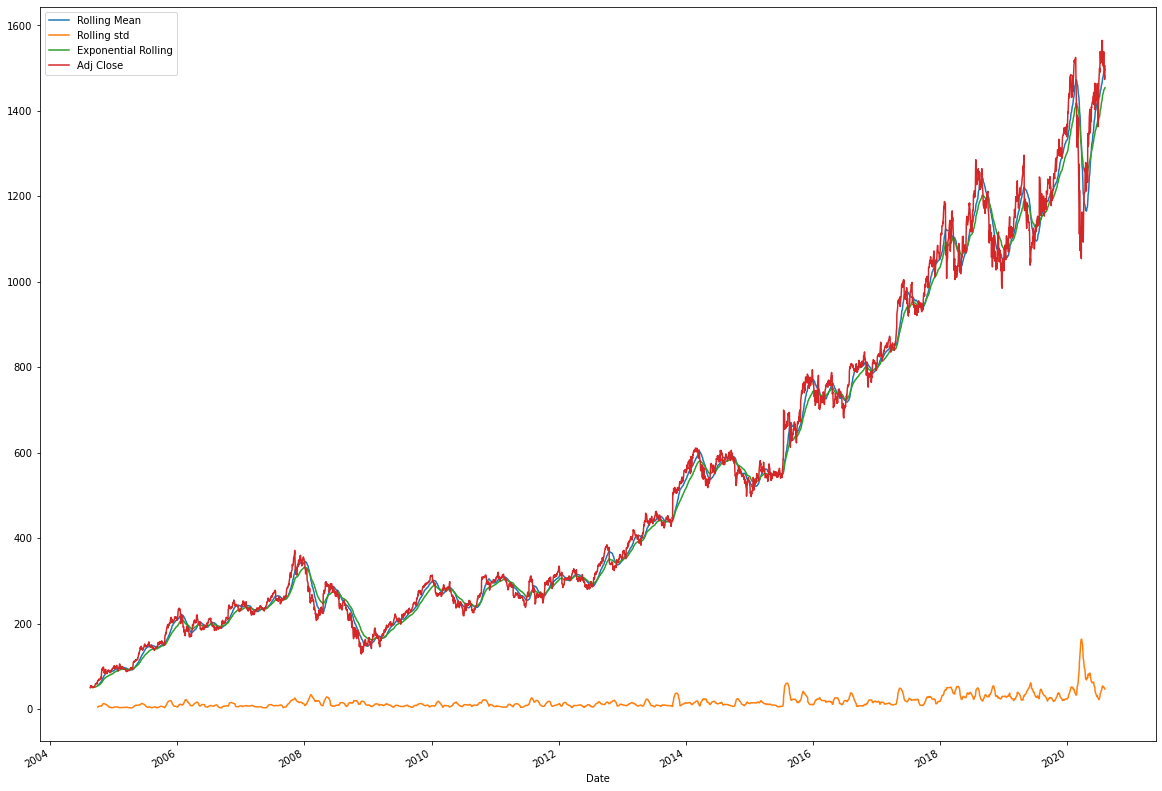

In [6]:
#Rolling data,std,mean and exponential rolling mean of data over a 30day period 
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
df['Adj Close'].rolling(30).mean().plot(ax=ax,label='Rolling Mean')
df['Adj Close'].rolling(30).std().plot(ax=ax,label='Rolling std')
df['Adj Close'].ewm(30,adjust=False).mean().plot(ax=ax,label='Exponential Rolling')
df['Adj Close'].plot(ax=ax,label='Adj Close')
plt.legend()

In [7]:
#Creating functions of indicators to add to data frame to check which ones are best for predicting future stock price

In [8]:
from ta.momentum import RSIIndicator
from ta.trend import MACD, ADXIndicator, AroonIndicator
from ta.volatility import BollingerBands
from ta.volume import OnBalanceVolumeIndicator

In [9]:
rsi_indicator = RSIIndicator(close=df['Adj Close'])
bollinger_band_indicator = BollingerBands(close=df['Adj Close'])
macd_indicator = MACD(df['Adj Close'])
adx_indicator = ADXIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
aroon_indicator = AroonIndicator(close=df['Adj Close'])
on_balance_volume_indicator = OnBalanceVolumeIndicator(close=df['Adj Close'],volume=df['Volume'])

In [10]:
df['RSI'] = rsi_indicator.rsi()
df['Bollinger Avg'] = bollinger_band_indicator.bollinger_mavg()
df['Bollinger High'] = bollinger_band_indicator.bollinger_hband()
df['Bollinger Low'] = bollinger_band_indicator.bollinger_lband()
df['MACD'] = macd_indicator.macd()
df['ADX'] = adx_indicator.adx()
df['Aroon'] = aroon_indicator.aroon_indicator()
df['OBV'] = on_balance_volume_indicator.on_balance_volume() 

C:\Users\Jonat\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Jonat\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [11]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,Bollinger Avg,Bollinger High,Bollinger Low,MACD,ADX,Aroon,OBV
Date,,,,,,,,,,,,,,
2020-07-31,1497.050049,1505.020020,1454.000000,1487.949951,1487.949951,4576400,48.055098,1521.253003,1563.991154,1478.514852,17.019960,22.173575,68.0,1402381900
2020-08-03,1491.000000,1497.729980,1471.719971,1482.760010,1482.760010,2274100,47.182079,1520.408502,1565.427400,1475.389604,12.995770,20.811834,64.0,1400107800
2020-08-04,1486.709961,1493.109985,1464.030029,1473.300049,1473.300049,1860600,45.557447,1519.577502,1567.346436,1471.808569,8.940174,19.768690,60.0,1398247200
2020-08-05,1476.819946,1490.000000,1471.219971,1479.089966,1479.089966,1457500,46.765644,1518.352002,1568.875813,1467.828191,6.122704,18.800056,56.0,1399704700
2020-08-06,1476.150024,1506.270020,1471.900024,1504.949951,1504.949951,1664400,51.899988,1517.666498,1568.525910,1466.807086,5.908415,17.565778,52.0,1401369100


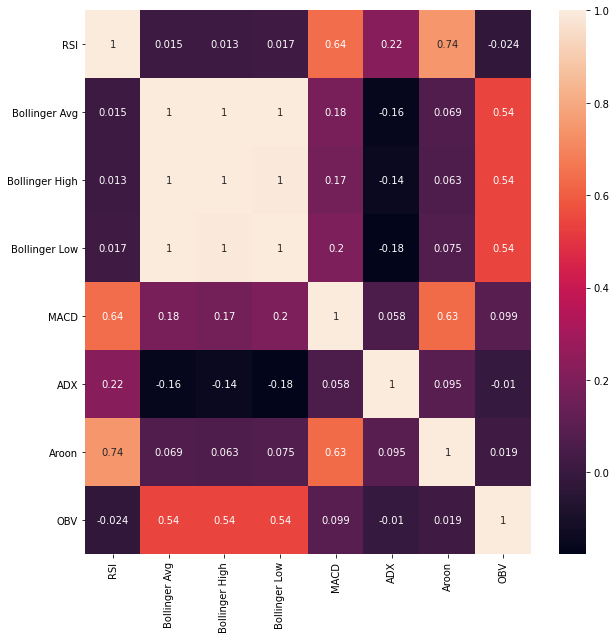

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.drop(columns=['Open','Close','High','Low','Adj Close','Volume']).corr(),annot=True)

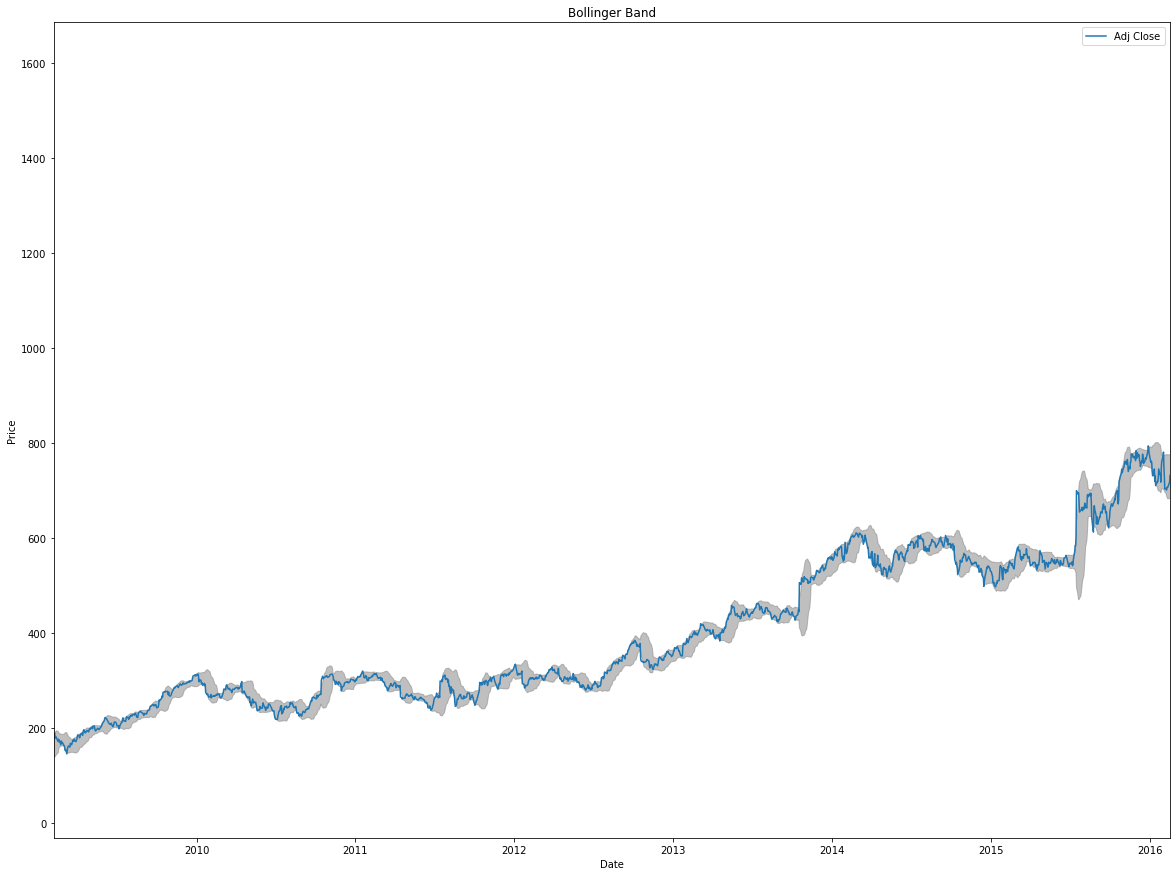

In [13]:
#plotting 
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
x_axis = df.index
plt.fill_between(x_axis,df['Bollinger High'],df['Bollinger Low'],color='grey',alpha=.5)
ax.plot(x_axis,df['Adj Close'],label='Adj Close')
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.xaxis.zoom(3)
ax.legend()

In [14]:
#We will be predicting the next day price. We are shifting the data by 1 day
df['Adj Close Shift'] = df['Adj Close'].shift(-1)
df.dropna(inplace=True)

In [15]:
#Checking data before we split it into training and testing 
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3994 entries, 2004-09-24 to 2020-08-05
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             3994 non-null   float64
 1   High             3994 non-null   float64
 2   Low              3994 non-null   float64
 3   Close            3994 non-null   float64
 4   Adj Close        3994 non-null   float64
 5   Volume           3994 non-null   int64  
 6   RSI              3994 non-null   float64
 7   Bollinger Avg    3994 non-null   float64
 8   Bollinger High   3994 non-null   float64
 9   Bollinger Low    3994 non-null   float64
 10  MACD             3994 non-null   float64
 11  ADX              3994 non-null   float64
 12  Aroon            3994 non-null   float64
 13  OBV              3994 non-null   int64  
 14  Adj Close Shift  3994 non-null   float64
dtypes: float64(13), int64(2)
memory usage: 499.2 KB


In [16]:
X = df.drop(columns=['Adj Close Shift','Adj Close','Open','High','Low','Close','Volume'])
y = df['Adj Close Shift']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)

In [17]:
#print(4000*.70)
#print(df.iloc[0])
#print(df.iloc[2800])
#print(df.iloc[3993])

In [18]:
#Spliting the dta into training and testing
#X_train = df.drop(columns=['Adj Close Shift','Adj Close','Open','High','Low','Close','Volume']).loc['2004-09-24':'2015-11-06']
#X_test = df.drop(columns=['Adj Close Shift','Adj Close','Open','High','Low','Close','Volume']).loc['2015-11-07':'2020-08-05']
#y_train = df['Adj Close Shift'].loc['2004-09-24':'2015-11-06']
#y_test = df['Adj Close Shift'].loc['2015-11-07':'2020-08-05']

In [19]:
X_train_columns= X_train.columns
X_train_columns

Index(['RSI', 'Bollinger Avg', 'Bollinger High', 'Bollinger Low', 'MACD',
       'ADX', 'Aroon', 'OBV'],
      dtype='object')

In [20]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

LM R-Squared: 0.9977481181826479
LM Mean Absolute Error: 10.635342845313836


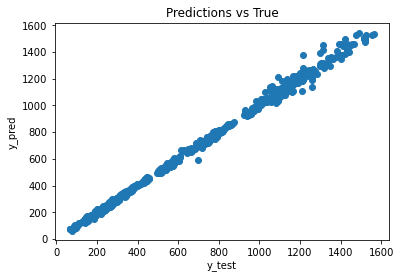

In [21]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error
rModel = linear_model.LinearRegression(normalize=True)
rModel.fit(X_train,y_train)
y_pred = rModel.predict(X_test)
#R-Squared coefficent
lm_r2score_test = r2_score(y_test,y_pred)
print('LM R-Squared:',lm_r2score_test)
#check to see how prediction repersnt true results
plt.scatter(y_test,y_pred)
plt.title('Predictions vs True')
plt.xlabel('y_test')
plt.ylabel('y_pred')
lm_mean_abs_error = mean_absolute_error(y_test,y_pred)
print('LM Mean Absolute Error:',lm_mean_abs_error)

In [22]:
imp = rModel.coef_

for x ,y in zip(imp,X_train_columns):
    print (y ,x)
 

RSI 14.492289989458644
Bollinger Avg 124.4430490083811
Bollinger High 138.105217437461
Bollinger Low 109.24683033270452
MACD 11.920184024306689
ADX -4.783381468359841
Aroon -5.695563571226309
OBV 0.5387971759024831


In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)
model_result = rfr.fit(X_train,y_train)
y_pred = model_result.predict(X_test)
r2score = r2_score(y_test,y_pred)
mean_abs_error = mean_absolute_error(y_test,y_pred)
print('R^2:',r2score)
print('Mean Absolute Error:',mean_abs_error)

R^2: 0.9989945626700537
Mean Absolute Error: 6.840629902435359


([<matplotlib.axis.YTick at 0x1916f4c17c0>,
 [Text(0, 0, 'ADX'),
  Text(0, 0, 'Aroon'),
  Text(0, 0, 'MACD'),
  Text(0, 0, 'RSI'),
  Text(0, 0, 'OBV'),
  Text(0, 0, 'Bollinger Low'),
  Text(0, 0, 'Bollinger High'),
  Text(0, 0, 'Bollinger Avg')])

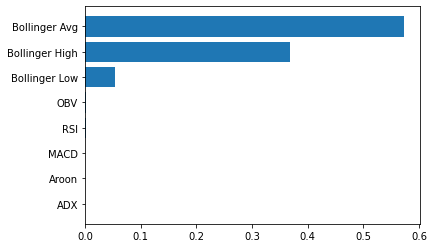

In [24]:
feature_importance = rfr.feature_importances_

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

plt.barh(pos,feature_importance[sorted_idx])
plt.yticks(pos,X_train_columns[sorted_idx])